# Add some text here

In [36]:
import pandas as pd
import nltk
#nltk.download('punkt')
from pprint import pprint

In [37]:
# load data

train_set = pd.read_json('./data/SubtaskA/subtaskA_train_monolingual.jsonl', lines=True)
dev_set = pd.read_json('./data/SubtaskA/subtaskA_dev_monolingual.jsonl', lines=True)

In [38]:
train_set.describe

<bound method NDFrame.describe of                                                      text  label    model   
0       Forza Motorsport is a popular racing game that...      1  chatGPT  \
1       Buying Virtual Console games for your Nintendo...      1  chatGPT   
2       Windows NT 4.0 was a popular operating system ...      1  chatGPT   
3       How to Make Perfume\n\nPerfume is a great way ...      1  chatGPT   
4       How to Convert Song Lyrics to a Song'\n\nConve...      1  chatGPT   
...                                                   ...    ...      ...   
119752  The paper is an interesting contribution, prim...      0    human   
119753  \nWe thank the reviewers for all their comment...      0    human   
119754  The authors introduce a semi-supervised method...      0    human   
119755  This paper proposes the Neural Graph Machine t...      0    human   
119756  The paper proposes a model that aims at learni...      0    human   

          source      id  
0        wikih

In [39]:
print(f'Different models in train set:  {set(train_set["model"])}')
print(f'Different sources in train set: {set(train_set["source"])}')

Different models in train set:  {'cohere', 'chatGPT', 'davinci', 'dolly', 'human'}
Different sources in train set: {'reddit', 'arxiv', 'peerread', 'wikipedia', 'wikihow'}


In [40]:
# add code here to compute most used n-grams per model (ones that are not used in other models)

In [61]:
# average number of tokens in a sentence per model per source for monolingual training data (subtask A)
models = set(train_set['model'])
sources = set(train_set['source'])

data = {'source': list(sources)}

for model_name in models:
    sent_len_per_model = []
    for source in sources:
        text = train_set.loc[(train_set['model'] == model_name) & (train_set['source'] == source)]['text']
        avg = (text.apply(nltk.word_tokenize).str.len().sum() / text.apply(nltk.sent_tokenize).str.len().sum())
        sent_len_per_model.append(avg)        
 
    data[model_name] = sent_len_per_model

In [62]:
df = pd.DataFrame.from_dict(data)

<Axes: xlabel='source', ylabel='average number of tokens per sentence'>

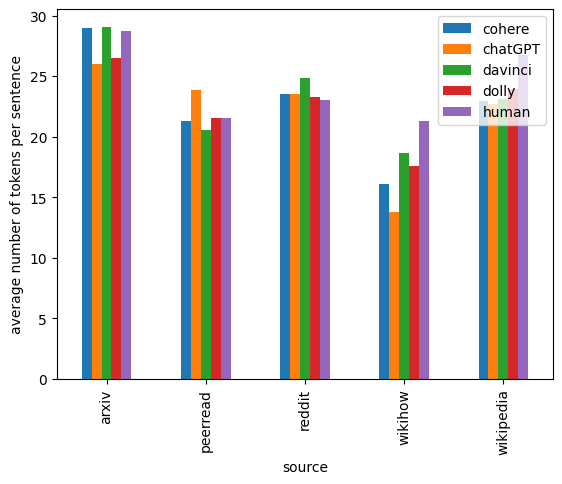

In [63]:
# plot average sentence length per model per source
plot = df.groupby('source').sum()
plot.plot(kind='bar', ylabel='average number of tokens per sentence')